## Importing and getting to know the Df

In [8]:
import os  # operating system interface 
print(os.getcwd())

C:\Users\Sebastian\Desktop\SoSe 24\DELTA\Assignments\3


In [9]:
import pandas as pd
import pyarrow.parquet as pq
import numpy as np
#with gzip.open('btc_tweets_train.parquet.gzip', 'rt') as f:
 #   content = f.read()
    # Process the content

In [10]:
df = pd.read_parquet('btc_tweets_train.parquet.gzip', engine='pyarrow')
# Display the first few rows of the dataframe
df.head()

,hashtags,content,username,user_displayname,sentiment
tweet ID,,,,,
1641579121972236290,"[Bitcoin, Bitcoin, BTC, Bitcoin, BTC, SHIB, HO...","$Bitcoin TO $100,000 SOONER THAN YOU THINK‼️💯🙏...",BezosCrypto,SHIB Bezos,True
1641579176171016194,"[Bitcoin, bitcoinordinals, crypto]",Alright I have my rares. Who else is grabbing ...,spartantc81,SpartanTC,True
1641579486071390208,"[BTC, SHIB, HOGE, SAITAMA, BNB, DOGE, ETH, Bab...","Bitcoin (BTC) Targets Over $100,000 as This Im...",BezosCrypto,SHIB Bezos,True
1641579537103302656,[BTC],📢 Xverse Web-based pool is live:\n\n•Update @x...,godfred_xcuz,Algorithm.btc,True
1641579588399804418,[Bitcoin],"Yesterday, a Bitcoin projection was displayed ...",goddess81oo,she is lucky,True


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 1641579121972236290 to 1641861677149822976
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   hashtags          1500 non-null   object
 1   content           1500 non-null   object
 2   username          1500 non-null   object
 3   user_displayname  1500 non-null   object
 4   sentiment         1500 non-null   bool  
dtypes: bool(1), object(4)
memory usage: 60.1+ KB


In [12]:
df.isnull().sum().sum()

0

In [13]:
df.iloc[1299,1]

'⚡ JUST IN: now @PiNewsMedia twitter page  hit 600k Followers Milestone‼️🐦🙋\u200d♀️🫶🙋\n\n♻️ Retweet if you are excited! ♻️\n\n#PiNetwork #P2E #crypto #Airdrop #Pioneers #Picoin #Web3 #1000x\n#Picommunity #BNB #BTC\u202f\u202f\u202f\u202f\u202f\u202f\nLike💖 RT♻️ and follow🐦 https://t.co/qgarKyLgfW'

In [14]:
df['sentiment'].value_counts()

sentiment
True     1220
False     280
Name: count, dtype: int64

## Df Cleaning

In [16]:
df.reset_index(inplace=True)
df.drop(columns=['tweet ID','hashtags','username','user_displayname'], inplace=True)

In [17]:
#Get the number of duplicated rows and remove any duplicates after that:
print('Number of duplicated samples: ',df[df.duplicated()].shape[0])
df=df.drop_duplicates(keep='first')

Number of duplicated samples:  0


In [18]:
df.head()

,content,sentiment
0,"$Bitcoin TO $100,000 SOONER THAN YOU THINK‼️💯🙏...",True
1,Alright I have my rares. Who else is grabbing ...,True
2,"Bitcoin (BTC) Targets Over $100,000 as This Im...",True
3,📢 Xverse Web-based pool is live:\n\n•Update @x...,True
4,"Yesterday, a Bitcoin projection was displayed ...",True


## Text Cleaning

In [20]:
def remove_whitespace(text):
    """ Function to remove whitespace (tabs, newlines). """
    return ' '.join(text.split())

In [21]:
import re
def remove_links(text):
    """Function to remove hyperlinks from the text."""
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

In [22]:
def remove_punctuation_and_casing(text):
    """
    Function to remove the punctuation, upper casing and words that include
    non-alphanumeric characters.
    """
    chars = '!\"#$%&()*+,-./:;<=>?@[\]^_`{|}~'
    text = text.translate(str.maketrans(chars, ' ' * len(chars)))
    return ' '.join([word.lower() for word in text.split() if word.isalpha()])

In [23]:
from nltk.corpus import stopwords

english_stopwords = stopwords.words('english')

def remove_stopwords(text):
    """ Function to remove stopwords. """
    return ' '.join([word for word in str(text).split() if not word in english_stopwords])

In [24]:
# NLTK lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_words(text, **kwargs):
    """ Function to lemmatize words. """
    return ' '.join([lemmatizer.lemmatize(word, **kwargs) for word in text.split()])

In [25]:
from nltk.tokenize import word_tokenize

In [26]:
def preprocess_text(text):
    """Function to preprocess text by removing links, whitespace, punctuation, and converting to lower case."""
    text = remove_links(text)
    text = remove_whitespace(text)
    text = remove_punctuation_and_casing(text)
    text = remove_stopwords(text)
    text = lemmatize_words(text)
    text =  ' '.join(word_tokenize(text)) #to return only the text and not a list
#    text = stem_words(text)
    return text

In [27]:
df['cleaned_content'] = df['content'].apply(preprocess_text)

In [28]:
df.head()

,content,sentiment,cleaned_content
0,"$Bitcoin TO $100,000 SOONER THAN YOU THINK‼️💯🙏...",True,bitcoin sooner bitcoin whether believe btc bit...
1,Alright I have my rares. Who else is grabbing ...,True,alright rares else grabbing dogepunksbtc disco...
2,"Bitcoin (BTC) Targets Over $100,000 as This Im...",True,bitcoin btc target important pattern reemerges...
3,📢 Xverse Web-based pool is live:\n\n•Update @x...,True,xverse web based pool live xverseapp chrome br...
4,"Yesterday, a Bitcoin projection was displayed ...",True,yesterday bitcoin projection displayed europea...


In [29]:
## After the process:
# Check all is well
ix = 12  # just one example, play with other play to further examine the effect of our clearning
print('Original Review:\n' + df.content[ix])  
print('\nCleaned Review:\n' + df.cleaned_content[ix])
#from nlp_foundations

Original Review:
They want riots. Give them bank runs instead.

#Silver #Gold #Bitcoin 
#IStandWithTrump https://t.co/wBQupqFyuj

Cleaned Review:
want riot give bank run instead silver gold bitcoin istandwithtrump


## (1) Sentiment Dictionary Benchmark - vaderSentiment

In [31]:
#pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [32]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re

def remove_links(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

def remove_whitespace(text):
    return ' '.join(text.split())

def remove_punctuation_and_casing(text):
    chars = '!\"#$%&()*+,-./:;<=>?@[\]^_`{|}~'
    text = text.translate(str.maketrans(chars, ' ' * len(chars)))
    return ' '.join([word.lower() for word in text.split() if word.isalpha()])

def preprocess_tweet(text):
    text = remove_links(text)
    text = remove_whitespace(text)
    text = remove_punctuation_and_casing(text)
    return text

# Example tweets
tweets = ["I love this product! #awesome", "This is the worst experience ever! http://example.com"]

# Preprocess tweets
preprocessed_tweets = [preprocess_tweet(tweet) for tweet in tweets]

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Analyze sentiment
for tweet in preprocessed_tweets:
    sentiment = analyzer.polarity_scores(tweet)
    print(f"Tweet: {tweet}")
    print(f"Sentiment: {sentiment}")
    print("\n")

Tweet: i love this product awesome
Sentiment: {'neg': 0.0, 'neu': 0.265, 'pos': 0.735, 'compound': 0.8519}


Tweet: this is the worst experience ever
Sentiment: {'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}




In [33]:
#dictionary = pd.DataFrame(df['cleaned_content'])

In [34]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    sentiment_dict = analyzer.polarity_scores(text)
    return sentiment_dict

# Apply sentiment analysis to each tweet
df['vader_sentiment'] = df['cleaned_content'].apply(analyze_sentiment)

# Extract compound score for simplicity
df['vader_compound'] = df['vader_sentiment'].apply(lambda x: x['compound'])

In [35]:
print(df['vader_compound'].head())

0    0.0000
1   -0.1779
2    0.2023
3    0.2023
4    0.0000
Name: vader_compound, dtype: float64


In [36]:
pd.set_option('display.max_colwidth', None)
print(df['vader_sentiment'].head())

0              {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
1    {'neg': 0.172, 'neu': 0.701, 'pos': 0.127, 'compound': -0.1779}
2       {'neg': 0.0, 'neu': 0.917, 'pos': 0.083, 'compound': 0.2023}
3       {'neg': 0.0, 'neu': 0.904, 'pos': 0.096, 'compound': 0.2023}
4              {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Name: vader_sentiment, dtype: object


In [37]:
# Convert compound score to sentiment label
def compound_to_binary_sentiment(compound_score):
    if compound_score > 0:
        return 1  # Positive
    elif compound_score <= 0:
        return 0  # Negative

df['vader_label'] = df['vader_compound'].apply(compound_to_binary_sentiment)

### Sentiment classifier assessment

In [39]:
#Comparison (If you have actual labels, you can evaluate the performance)
if 'sentiment' in df.columns:
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

    # Calculate metrics
    accuracy = accuracy_score(df['sentiment'], df['vader_label'])
    precision = precision_score(df['sentiment'], df['vader_label'], average='weighted')
    recall = recall_score(df['sentiment'], df['vader_label'], average='weighted')
    f1 = f1_score(df['sentiment'], df['vader_label'], average='weighted')

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")

Accuracy: 0.6006666666666667
Precision: 0.7763493272404165
Recall: 0.6006666666666667
F1-score: 0.6446937459703418


In [40]:
df.head()

,content,sentiment,cleaned_content,vader_sentiment,vader_compound,vader_label
0,"$Bitcoin TO $100,000 SOONER THAN YOU THINK‼️💯🙏\n\n#Bitcoin TO $100,000 WHETHER YOU BELIEVE OR NOT‼️💯🙏\n\n$BTC #Bitcoin #BTC \n\n#Bitcoin #BTC #SHIB \n#HOGE #SAITAMA #BNB #DOGE #ETH #BabyFloki #AltCoinSeason https://t.co/rtlFlKlVCv",True,bitcoin sooner bitcoin whether believe btc bitcoin btc bitcoin btc shib hoge saitama bnb doge eth babyfloki altcoinseason,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,0
1,Alright I have my rares. Who else is grabbing some of these @DogePunksBTC? Been in the discord a bit today and lovin the vibes. #Bitcoin #bitcoinordinals #crypto https://t.co/oaSNb6zOfK,True,alright rares else grabbing dogepunksbtc discord bit today lovin vibe bitcoin bitcoinordinals crypto,"{'neg': 0.172, 'neu': 0.701, 'pos': 0.127, 'compound': -0.1779}",-0.1779,0
2,"Bitcoin (BTC) Targets Over $100,000 as This Important Pattern Reemerges, Analyst Says\n\n$Bitcoin TO $100,000 SOONER THAN YOU THINK‼️💯🙏\n\n#BTC TO $100,000 WHETHER YOU BELIEVE OR NOT‼️💯🙏\n\n#SHIB \n#HOGE #SAITAMA #BNB #DOGE #ETH #BabyFloki #AltCoinSeason https://t.co/gU71C732NS",True,bitcoin btc target important pattern reemerges analyst say bitcoin sooner btc whether believe shib hoge saitama bnb doge eth babyfloki altcoinseason,"{'neg': 0.0, 'neu': 0.917, 'pos': 0.083, 'compound': 0.2023}",0.2023,1
3,📢 Xverse Web-based pool is live:\n\n•Update @xverseApp Chrome Browser Extension wallet to V0.6.2\n\n•Stack @Stacks 👇\n\n https://t.co/s17rWwKnPD\n\n•Earn #BTC Yield\n\n•Continuous Stacking\n\n•Stacking amount Top up at any moment of the cycle https://t.co/sBm89okDyb,True,xverse web based pool live xverseapp chrome browser extension wallet stack btc yield stacking amount top moment cycle,"{'neg': 0.0, 'neu': 0.904, 'pos': 0.096, 'compound': 0.2023}",0.2023,1
4,"Yesterday, a Bitcoin projection was displayed on the European Central Bank building in Frankfurt, Germany.\n🥰🥰\n#Bitcoin https://t.co/rUEdQxZmgU",True,yesterday bitcoin projection displayed european central bank building frankfurt germany bitcoin,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,0


count    1500.000000
mean        0.227724
std         0.405509
min        -0.895700
25%         0.000000
50%         0.128000
75%         0.575150
max         0.978300
Name: vader_compound, dtype: float64

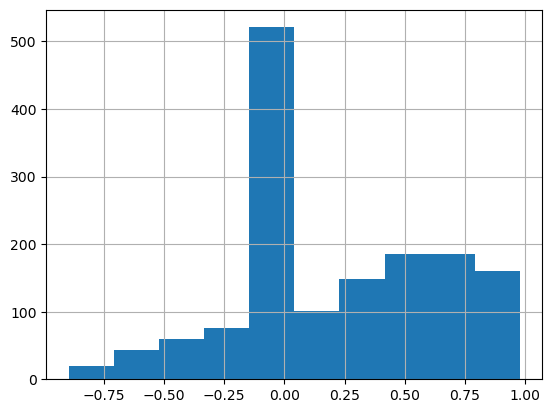

In [41]:
df['vader_compound'].hist(); 
df['vader_compound'].describe() # overall rather positive

In [42]:
#check #https://github.com/Humboldt-WI/delta/blob/master/demos/nlp/sentiment_analysis.ipynb

## Check dropping neutral compound values

In [44]:
def compound_to_binary_sentiment_2(compound_score):
    if compound_score >= 0.05:
        return 1  # Positive
    elif compound_score <= -0.05:
        return 0  # Negative
    else:
        return None  # Neutral, will be ignored

df['vader_binary_label_2'] = df['vader_compound'].apply(compound_to_binary_sentiment_2)

In [45]:
temp = df.copy()
temp = temp.dropna()

In [46]:
temp['vader_binary_label_2'].isna().sum()

0

In [47]:
# Convert boolean values to integers
temp['sentiment'] = temp['sentiment'].astype(int)

# Print the first few rows to verify the change
print(temp.head())

                                                                                                                                                                                                                                                                                     content  \
1                                                                                                  Alright I have my rares. Who else is grabbing some of these @DogePunksBTC? Been in the discord a bit today and lovin the vibes. #Bitcoin #bitcoinordinals #crypto https://t.co/oaSNb6zOfK   
2  Bitcoin (BTC) Targets Over $100,000 as This Important Pattern Reemerges, Analyst Says\n\n$Bitcoin TO $100,000 SOONER THAN YOU THINK‼️💯🙏\n\n#BTC TO $100,000 WHETHER YOU BELIEVE OR NOT‼️💯🙏\n\n#SHIB \n#HOGE #SAITAMA #BNB   #DOGE #ETH #BabyFloki #AltCoinSeason  https://t.co/gU71C732NS   
3                 📢 Xverse Web-based pool is live:\n\n•Update @xverseApp Chrome Browser Extension wallet to V0.6.2\n\n•Stack @Stacks 👇\n

In [48]:
#Comparison (If you have actual labels, you can evaluate the performance)
if 'sentiment' in temp.columns:
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

    # Calculate metrics
    accuracy = accuracy_score(temp['sentiment'], temp['vader_binary_label_2'])
    precision = precision_score(temp['sentiment'], temp['vader_binary_label_2'], average='weighted')
    recall = recall_score(temp['sentiment'], temp['vader_binary_label_2'], average='weighted')
    f1 = f1_score(temp['sentiment'], temp['vader_binary_label_2'], average='weighted')

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")

Accuracy: 0.8260437375745527
Precision: 0.8307821552644649
Recall: 0.8260437375745527
F1-score: 0.8282008937981569


In [49]:
# Print the DataFrame to see the results
df.head()

,content,sentiment,cleaned_content,vader_sentiment,vader_compound,vader_label,vader_binary_label_2
0,"$Bitcoin TO $100,000 SOONER THAN YOU THINK‼️💯🙏\n\n#Bitcoin TO $100,000 WHETHER YOU BELIEVE OR NOT‼️💯🙏\n\n$BTC #Bitcoin #BTC \n\n#Bitcoin #BTC #SHIB \n#HOGE #SAITAMA #BNB #DOGE #ETH #BabyFloki #AltCoinSeason https://t.co/rtlFlKlVCv",True,bitcoin sooner bitcoin whether believe btc bitcoin btc bitcoin btc shib hoge saitama bnb doge eth babyfloki altcoinseason,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,0,NaN
1,Alright I have my rares. Who else is grabbing some of these @DogePunksBTC? Been in the discord a bit today and lovin the vibes. #Bitcoin #bitcoinordinals #crypto https://t.co/oaSNb6zOfK,True,alright rares else grabbing dogepunksbtc discord bit today lovin vibe bitcoin bitcoinordinals crypto,"{'neg': 0.172, 'neu': 0.701, 'pos': 0.127, 'compound': -0.1779}",-0.1779,0,0.0
2,"Bitcoin (BTC) Targets Over $100,000 as This Important Pattern Reemerges, Analyst Says\n\n$Bitcoin TO $100,000 SOONER THAN YOU THINK‼️💯🙏\n\n#BTC TO $100,000 WHETHER YOU BELIEVE OR NOT‼️💯🙏\n\n#SHIB \n#HOGE #SAITAMA #BNB #DOGE #ETH #BabyFloki #AltCoinSeason https://t.co/gU71C732NS",True,bitcoin btc target important pattern reemerges analyst say bitcoin sooner btc whether believe shib hoge saitama bnb doge eth babyfloki altcoinseason,"{'neg': 0.0, 'neu': 0.917, 'pos': 0.083, 'compound': 0.2023}",0.2023,1,1.0
3,📢 Xverse Web-based pool is live:\n\n•Update @xverseApp Chrome Browser Extension wallet to V0.6.2\n\n•Stack @Stacks 👇\n\n https://t.co/s17rWwKnPD\n\n•Earn #BTC Yield\n\n•Continuous Stacking\n\n•Stacking amount Top up at any moment of the cycle https://t.co/sBm89okDyb,True,xverse web based pool live xverseapp chrome browser extension wallet stack btc yield stacking amount top moment cycle,"{'neg': 0.0, 'neu': 0.904, 'pos': 0.096, 'compound': 0.2023}",0.2023,1,1.0
4,"Yesterday, a Bitcoin projection was displayed on the European Central Bank building in Frankfurt, Germany.\n🥰🥰\n#Bitcoin https://t.co/rUEdQxZmgU",True,yesterday bitcoin projection displayed european central bank building frankfurt germany bitcoin,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,0,NaN


## Embedding - FastText

In [51]:
from gensim.models import Word2Vec
import nltk
from nltk.corpus import brown

# Download and load the sample dataset
nltk.download('brown')
sentences = brown.sents()

# Train the Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)

# Save the model
model.save("word2vec.model")

# Load the model
model = Word2Vec.load("word2vec.model")

# Get the vector for a word
vector = model.wv['king']
print(vector)

# Find most similar words
similar_words = model.wv.most_similar('king')
print(similar_words)


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Sebastian\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.


[-0.04754073  0.11859329  0.04634677  0.05749667  0.00960768 -0.20187417
  0.16904429  0.3885344  -0.16235256 -0.18006463 -0.07618503 -0.3384256
  0.03057574  0.05386434  0.12564845 -0.08689472  0.03005948 -0.11511433
 -0.14245953 -0.26451734  0.16613416  0.00789564  0.0940092   0.0481417
 -0.0363173  -0.01332054 -0.14591563 -0.07319907 -0.08192716  0.01964954
  0.15392078 -0.14199392  0.13391481 -0.36004952  0.04088938  0.13991125
  0.05854261  0.08477964 -0.19698831 -0.08096439  0.1194607  -0.21643585
 -0.04836904 -0.00377496 -0.01296614  0.06994665 -0.17793988 -0.05955978
 -0.12388553  0.12019158  0.08666862 -0.22399251 -0.18187769 -0.1313965
  0.08110293  0.04073908  0.17330027  0.10406929 -0.07036056  0.01028723
 -0.02458962  0.05697131  0.0667474   0.03668865 -0.17568979  0.24178132
 -0.05660567  0.2742557  -0.19800487  0.25425795 -0.06393652  0.00101505
  0.2605313  -0.08247549  0.20577548  0.09692196  0.0409028   0.06301079
 -0.05247944  0.07877123 -0.16828847  0.10421323 -0.15

In [52]:
from gensim.models import FastText

In [53]:
type(df['cleaned_content'].iloc[1,])

str

In [54]:
df['cleaned_content'].iloc[1,]

'alright rares else grabbing dogepunksbtc discord bit today lovin vibe bitcoin bitcoinordinals crypto'

In [55]:
# Tokenize the cleaned tweets (split by spaces)
tokenized_tweets = [tweet.split() for tweet in df['cleaned_content']]

# Train FastText model using Gensim's implementation
fasttext_model = FastText(sentences=tokenized_tweets, vector_size=100, window=5, min_count=3, sg=1, epochs=10)

# Save the model
fasttext_model.save("fasttext.model")

# Load the model (for future use)
fasttext_model = FastText.load("fasttext.model")

# Example: Get vector for a word 
print(f"Vector for 'bitcoin': {fasttext_model.wv['bitcoin']}")

# Example: Get most similar words
print(f"Words similar to 'bitcoin': {fasttext_model.wv.most_similar('bitcoin')}")

Vector for 'bitcoin': [-0.31456876  0.18406731  0.06940509  0.15936592  0.03114506  0.06477211
 -0.03971462  0.3301362  -0.08092723 -0.09761299 -0.07824817 -0.30015787
 -0.11330729  0.25974053  0.10075969 -0.3354888  -0.10963674 -0.29834652
 -0.30812746 -0.5437982  -0.19944203  0.1528719   0.2267286  -0.03064081
  0.01762932 -0.18342775 -0.22177963  0.10914684  0.21375078 -0.01650226
  0.08966755  0.04945656  0.05899249 -0.09624448 -0.19599035  0.37711278
  0.20034659  0.14780645  0.01058333  0.31948215 -0.08179425 -0.2029979
  0.03494646 -0.14256208 -0.2353924  -0.31407645 -0.08175744 -0.10119695
 -0.01020761  0.23365174  0.12621145  0.03729318  0.43573114  0.15458341
 -0.20716219  0.03690385  0.1507151  -0.4025662  -0.06156662  0.00883337
  0.04950842 -0.13660453 -0.09047117  0.06983955  0.35509533 -0.15746026
 -0.03018745 -0.10770898 -0.10081211 -0.04019992  0.19053723  0.07377038
  0.28897554 -0.08887324  0.10853746 -0.05182971 -0.13203166 -0.12833388
  0.11594332  0.0373453  -0.03

In [99]:
type(df)

pandas.core.frame.DataFrame

## (2) RNN-based language classifier

In [101]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, LSTM, Dense, Dropout, SimpleRNN
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

Notes: 
- So using two embedding layers is important.


### Partitioning

In [103]:
X_train, X_val, y_train, y_val = train_test_split(df['cleaned_content'],df['sentiment'], test_size = 0.2, random_state = 5)

In [105]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1200,), (300,), (1200,), (300,))

In [107]:
type(X_train)

pandas.core.series.Series

### Building vocabulary - Tokenizing & Padding

In [109]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [113]:
# Tokenize the text
tokenizer = Tokenizer(num_words=5000, oov_token=1)
# The oov_token is a placeholder token that replaces any OOV words during the text_to_sequence calls.
#This ensures that your model can handle new, unseen words gracefully.
tokenizer.fit_on_texts(X_train)

In [115]:
# On how many tweets did we train?
print(tokenizer.document_count)

1200


In [117]:
# How many unique words?
len(tokenizer.word_counts)

4869

In [119]:
# A dictionary of words storing in how many documents a word appeared
word = 'bitcoin'  
n = tokenizer.word_docs[word]
print('The word <{}> appeared in {} tweets.'.format(word, n))

The word <bitcoin> appeared in 840 tweets.


In [121]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)

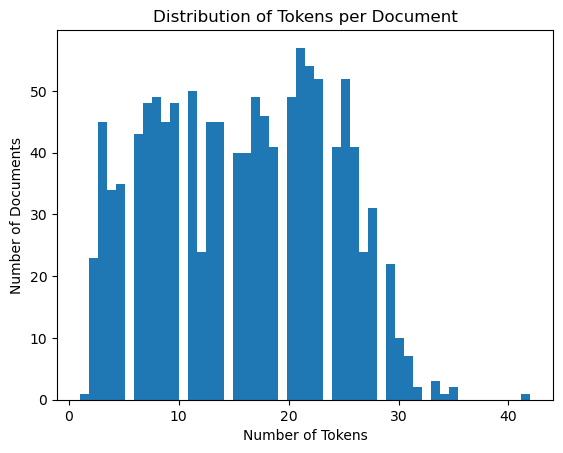

In [123]:
import matplotlib.pyplot as plt
# Calculate the number of tokens per document
num_tokens_per_doc = [len(seq) for seq in X_train_seq]

# Plot the distribution
plt.hist(num_tokens_per_doc, bins=50)
plt.xlabel('Number of Tokens')
plt.ylabel('Number of Documents')
plt.title('Distribution of Tokens per Document')
plt.show()

In [125]:
import numpy as np

# Calculate the 95th percentile of the number of tokens per document
max_length = int(np.percentile(num_tokens_per_doc, 95))
print(f"Recommended max length for padding: {max_length}")


Recommended max length for padding: 28


In [127]:
# Pad the sequences
max_length = 28  # Set max length for padding
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_length, padding='post')

### Load own (FastText) Embeddings

In [129]:
# Create an embedding matrix
embedding_dim = 100  # Must match the dimension of FastText vectors
vocab_size = len(tokenizer.word_index) + 1   #it's the total number of unique words in your tokenizer’s vocabulary plus one. The +1 accounts for the padding token (index 0).
embedding_matrix = np.zeros((vocab_size, embedding_dim)) #embedding_matrix is initialized as a matrix of zeros with shape (vocab_size, embedding_dim). 
                                                        #This matrix will eventually hold the FastText vectors for each word in your vocabulary.

for word, i in tokenizer.word_index.items():
    if word in fasttext_model.wv:
        embedding_matrix[i] = fasttext_model.wv[word]

print(f"Embedding matrix shape: {embedding_matrix.shape}")

Embedding matrix shape: (4871, 100)


In [131]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00404984, -0.00230946, -0.00228412, ...,  0.00901384,
         0.0011077 , -0.00440051],
       [-0.31456876,  0.18406731,  0.06940509, ..., -0.0623431 ,
         0.06703264,  0.15028034],
       ...,
       [-0.15293095,  0.08288611, -0.01640259, ..., -0.0148523 ,
         0.03586863,  0.1058212 ],
       [-0.22169663,  0.10342633, -0.01509595, ..., -0.02656429,
         0.06339251,  0.15360913],
       [-0.13922073,  0.06155584, -0.02047212, ..., -0.04799367,
         0.09034417,  0.14106375]])

### Simple RNN Model

In [134]:
# Model definition
SR_model = Sequential() # Input shape
SR_model.add(SimpleRNN(100, activation='relu', input_shape=(5, 321)))  # First RNN layer with 50 units
SR_model.add(Dense(1))  # Output layer
SR_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100)               42200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 42,301
Trainable params: 42,301
Non-trainable params: 0
_________________________________________________________________


In [136]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_length, trainable=False))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 28, 100)           487100    
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 604,477
Trainable params: 117,377
Non-trainable params: 487,100
_________________________________________________________________


In [138]:
#Train the model
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_data=(X_val_pad, y_val))

Epoch 1/10
38/38 [==============================] - 3s 27ms/step - loss: 0.5219 - accuracy: 0.8058 - val_loss: 0.4632 - val_accuracy: 0.8167
Epoch 2/10
38/38 [==============================] - 0s 11ms/step - loss: 0.4681 - accuracy: 0.8108 - val_loss: 0.4692 - val_accuracy: 0.8167
Epoch 3/10
38/38 [==============================] - 0s 11ms/step - loss: 0.4666 - accuracy: 0.8083 - val_loss: 0.4734 - val_accuracy: 0.8133
Epoch 4/10
38/38 [==============================] - 0s 10ms/step - loss: 0.4586 - accuracy: 0.8108 - val_loss: 0.4464 - val_accuracy: 0.8167
Epoch 5/10
38/38 [==============================] - 0s 11ms/step - loss: 0.4561 - accuracy: 0.8100 - val_loss: 0.4490 - val_accuracy: 0.8200
Epoch 6/10
38/38 [==============================] - 0s 11ms/step - loss: 0.4506 - accuracy: 0.8108 - val_loss: 0.4464 - val_accuracy: 0.8167
Epoch 7/10
38/38 [==============================] - 0s 11ms/step - loss: 0.4496 - accuracy: 0.8100 - val_loss: 0.4489 - val_accuracy: 0.8167
Epoch 8/10
38

In [143]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_val_pad, y_val)
print(f"Test Accuracy: {accuracy}")

# Predict on test data
y_pred = model.predict(X_val_pad)
y_pred = (y_pred > 0.5).astype("int32")

from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))


10/10 [==============================] - 0s 5ms/step - loss: 0.4499 - accuracy: 0.8200
Test Accuracy: 0.8199999928474426
10/10 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

       False       1.00      0.02      0.04        55
        True       0.82      1.00      0.90       245

    accuracy                           0.82       300
   macro avg       0.91      0.51      0.47       300
weighted avg       0.85      0.82      0.74       300



###False (Class 0):

Precision: 1.00
All predictions made for the "False" class are correct. However, given the other metrics, this likely means very few predictions were made as "False."
Recall: 0.02
The model only correctly identified 2% of the actual "False" instances. This indicates that the model is largely missing instances of this class.
F1-Score: 0.04
The low F1-score reflects the imbalance between the high precision and very low recall.
Support: 55
There are 55 instances of the "False" class in the dataset.


###True (Class 1):
Precision: 0.82
82% of the predictions for the "True" class are correct.
Recall: 1.00
The model correctly identifies 100% of the "True" instances. However, this could mean that the model is over-predicting this class.
F1-Score: 0.90
The F1-score is high due to the perfect recall and reasonably good precision.
Support: 245
There are 245 instances of the "True" class in the dataset.
Accuracy: 0.82

The model correctly predicted 82% of the total instances in the dataset.

###Macro Average:
Precision: 0.91
Average precision across both classes.
Recall: 0.51
Average recall across both classes. The low value here reflects the poor performance on the "False" class.
F1-Score: 0.47
Average F1-score across both classes, showing an imbalance due to the very low performance on the "False" class.

###Weighted Average:
Precision: 0.85
Recall: 0.82
F1-Score: 0.74
These metrics are weighted by the support (number of instances) for each class, showing a more balanced view but still reflecting the issues with class imbalance.

Interpretation of the Results
Class Imbalance: The model seems to have a significant class imbalance issue, where it overwhelmingly predicts the "True" class (Class 1) and fails to correctly identify the "False" class (Class 0).

High Precision for False but Low Recall: The model is very conservative when predicting the "False" class (high precision), but it misses most of the actual "False" instances (low recall).

Potential Overfitting to True Class: The model might be overfitting to the "True" class, leading to high recall and reasonable precision but at the cost of completely neglecting the "False" class.

## Extra Stuff - To review  

In [ ]:
import pysentiment2 as ps
dc = ps.HIV4() # import Harvard IV-4 dictionary

def get_sentiment_score(text):
    score = round(dc.get_score(dc.tokenize(text))['Polarity'], 2)
    return score

In [ ]:
# Do the cleaning
# CAUTION: depending on your data set size, the processing might take a while 
import time  # To keep an eye on runtimes
start = time.time()
imdb_data['review_clean'] = text_cleaning(imdb_data.review)
print('Duration: {:.0f} sec'.format(time.time()-start))